### To predict whether a person will have diabetes or not.


In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
data=pd.read_csv('diabetes1.csv')

#### Basic checks

In [169]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [170]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [171]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1) No missing values.
2) 0 values not posiible for glucose,BP,Skin thickness and insulin. Thiss is called as data corruption.

#### Domain Analysis

1)Pregnancies:-Some women have diabetes before they get pregnant. This is called pregestational diabetes. Other women may get a type of diabetes that only happens in pregnancy. This is called gestational diabetes. Pregnancy can change how a woman's body uses glucose. This can make diabetes worse, or lead to gestational diabetes.

If you have gestational diabetes during pregnancy, generally your blood sugar returns to its usual level soon after delivery. But if you've had gestational diabetes, you have a higher risk of getting type 2 diabetes. You'll need to be tested for changes in blood sugar more often.

The risk of getting diabetes is 28% if the patient has concived more than 2 or 3 times.

2)Glucose:-Glucose is your body's source of fuel. Your pancreas makes insulin to move glucose from your bloodstream into muscle, fat, and liver cells, where your body turns it into energy. People with diabetes have too much blood sugar because their body cannot move glucose into fat, liver, and muscle cells to be changed into and stored for energy.

3)Blood Pressure:-A person with diabetes is twice as likely to have high blood pressure as someone who does not have diabetes. When you have diabetes, high blood sugar can damage your blood vessels and the nerves that help your heart pump.Similarly, high blood pressure can create increased strain on your heart and blood vessels. When these two conditions occur together, they increase the risk of heart disease (cardiovascular disease) and stroke.
High blood pressure:-  According to a 2018 article, people with high blood pressure usually have insulin resistance and have an increased risk of developing diabetes compared to those with typical blood pressure. Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.

4)Skin Thickness:-Skin thickening is frequently observed in patients with diabetes. Affected areas of skin can appear thickened, waxy, or edematous. These patients are often asymptomatic but can have a reduction in sensation and pain. Although different parts of the body can be involved, the hands and feet are most frequently involved.Diabetes can cause changes in the small blood vessels. These changes can cause skin problems called diabetic dermopathy. Dermopathy often looks like light brown, scaly patches. These patches may be oval or circular.


5)Insulin:-Insulin is a hormone your pancreas makes to lower blood glucose, or sugar. If you have diabetes, your pancreas either doesn't make enough insulin or your body doesn't respond well to it. Your body needs insulin to keep the blood sugar level in a healthy range.Type 1 diabetes causes damage to the beta cells in your pancreas that make insulin. As a result, your body can't produce enough of this hormone. Type 2 diabetes gradually makes it harder for your be


6)BMI:-Body mass index has a strong relationship to diabetes and insulin resistance. In obese individuals, the amount of nonesterified fatty acids, glycerol, hormones, cytokines, proinflammatory markers, and other substances that are involved in the development of insulin resistance, is increased. The pathogenesis in the development of diabetes is based on the fact that the β-islet cells of the pancreas are impaired, causing a lack of control of blood glucose. The development of diabetes becomes more inevitable if the failure of β-islet cells of the pancreas is accompanied by insulin resistance. Weight gain and body mass are central to the formation and rising incidence of type 1 and type 2 diabetes.

8)Age:-The prevalence of both type 2 diabetes and prediabetes increases with advancing age. The most important factors leading to hyperglycaemia are as follows: deficiency of insulin secretion developing with age, and growing insulin resistance caused by a change in body composition and sarcopaenia.The process of aging of the human body leads to impairment of energy homeostasis and abnormalities in carbohydrate metabolism. The most important causes of hyperglycaemia are thought to be deficiency of insulin secretion developing with age and growing insulin resistance.


#### Exploratory Data Analysis

In [177]:
# Step 1 Univariate Analysis

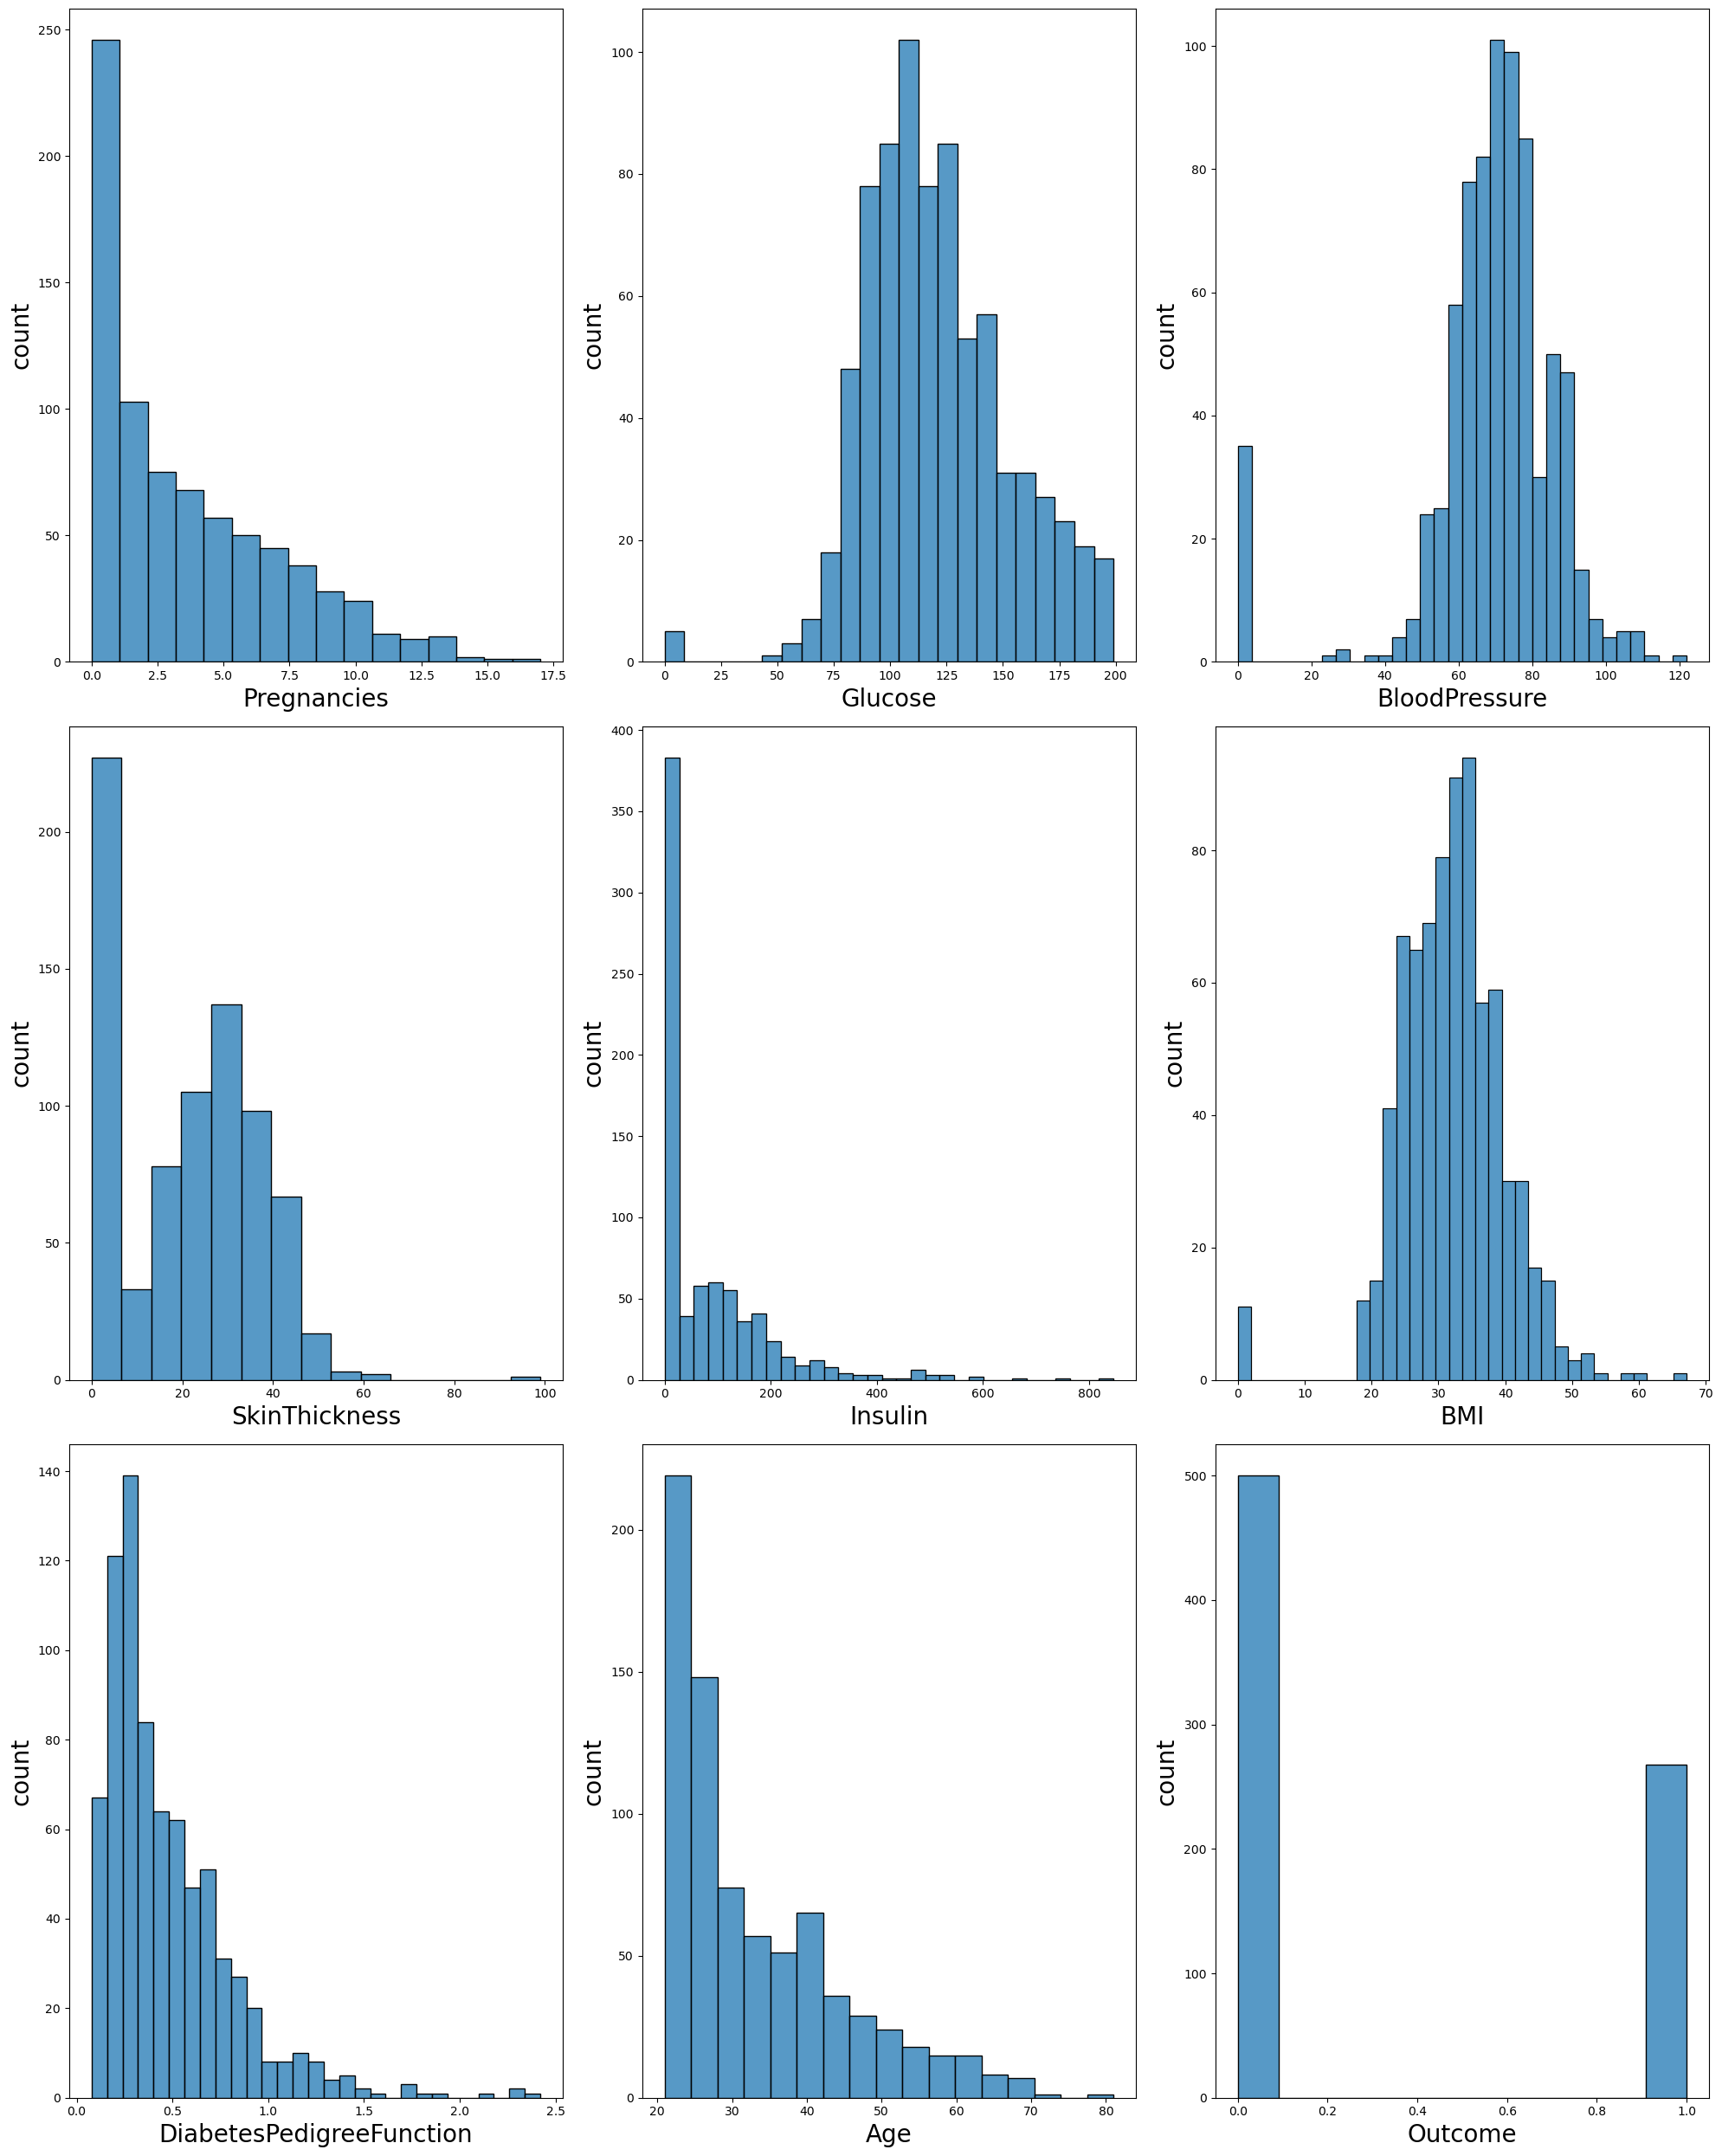

In [178]:
plt.figure(figsize=(20,25),facecolor='White')

plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Bivariate Analysis

In [180]:
##Bivariate Analysis refers to plots between input variables and target variable.

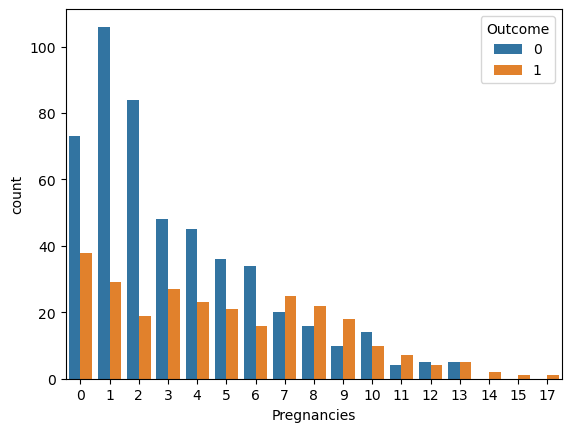

In [181]:
## Analyzing how preganancies impact the patient with diabetes

sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

1)If the pateint is preganent,she will get diabetes.But after analyzing this data,we found as the no of pregnenacy increases chances of getting diabetes also increases.
2)At from 14 to 17 pregnancies all women are diabetic.

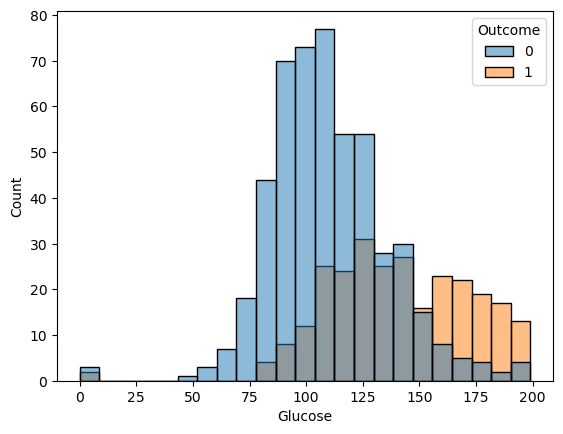

In [183]:
## Aanlyzing the relationship between diabetes and Glucose

sns.histplot(x='Glucose',hue='Outcome',data=data)
plt.show()

1)In the given data,a person having glucose range till 100 can be considered as they have lesser chance of getting diabetes.

2)A person having glucose range between 100 to 150,he is equaly at risk and no risk and we need to analyze more features of the pateint.

3)If a person have glucose more than 150,higher is the chnace of getting diabetes.

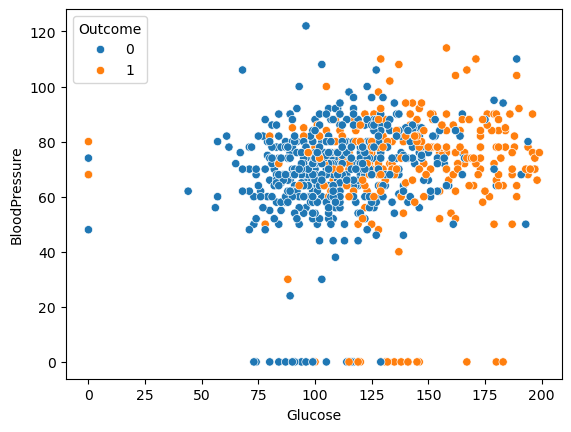

In [185]:
## Analyze Glucose with blood pressure

sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

By analyzing BP and Glucose together,we can say we need more features to understand if glucose increased to certain level,even if the BP is normal, the person is diabetic.

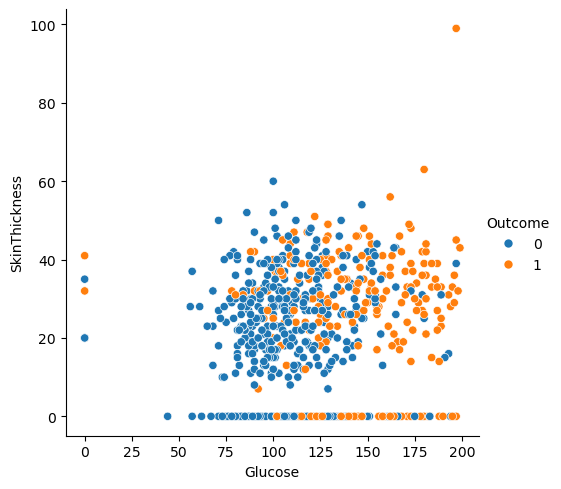

In [187]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

There seem to be no defined relationship between glucose and skin thickness as far as diabetes is concered from the given data. Thus we need other features to get the relation.

<Axes: xlabel='BloodPressure', ylabel='Count'>

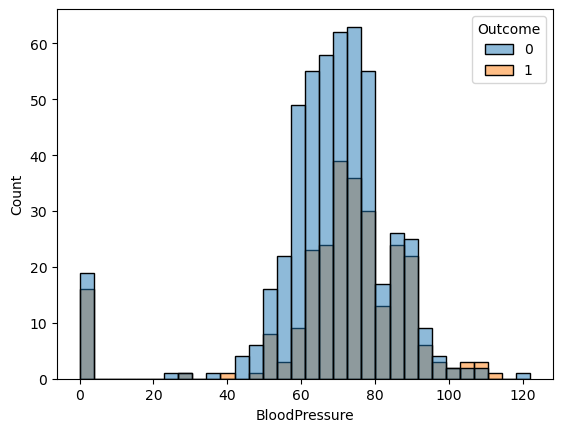

In [189]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

No specific relationship found.

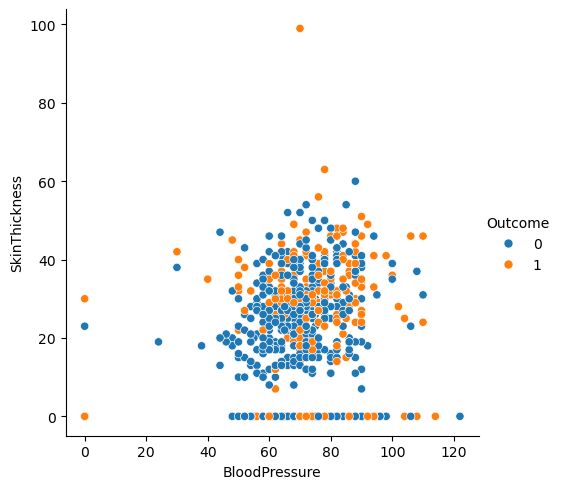

In [191]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

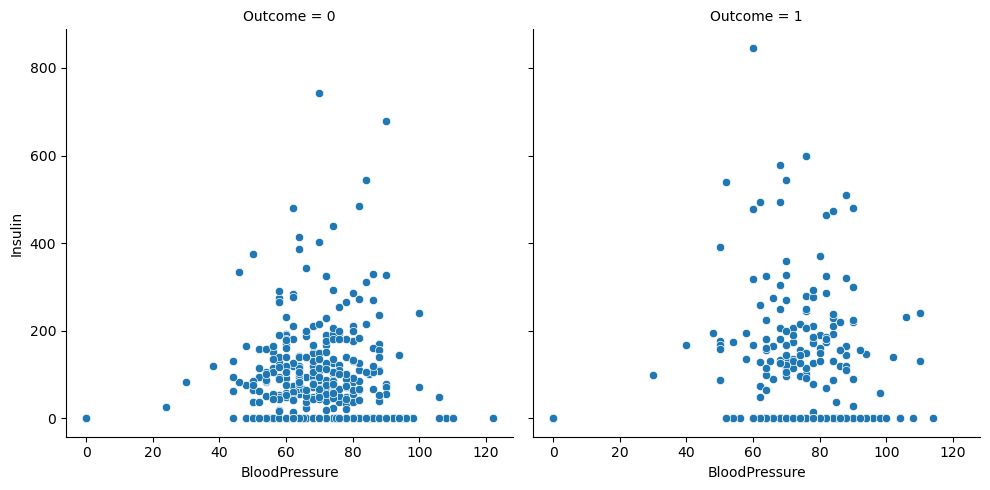

In [192]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

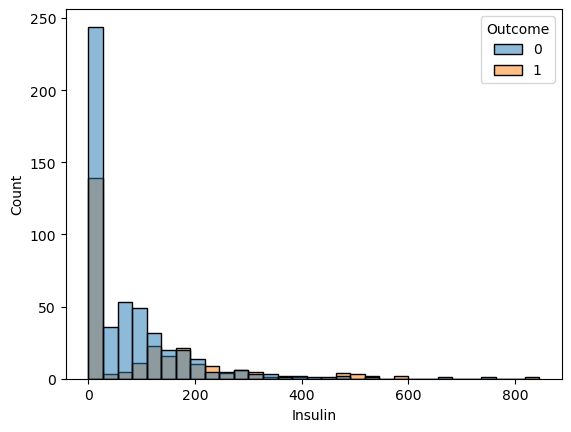

In [193]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

If the person has insulin level till 100,mostly he will be non diabetic afterwards,it shows the high requirement of insulin which means the person need more insluin to utilize the access glucose.

#### Data Preprocessing and feature engineering

In [196]:
#Step 1 Handling the missing values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [198]:
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [199]:
## Step 3:-Numerical representation of string data

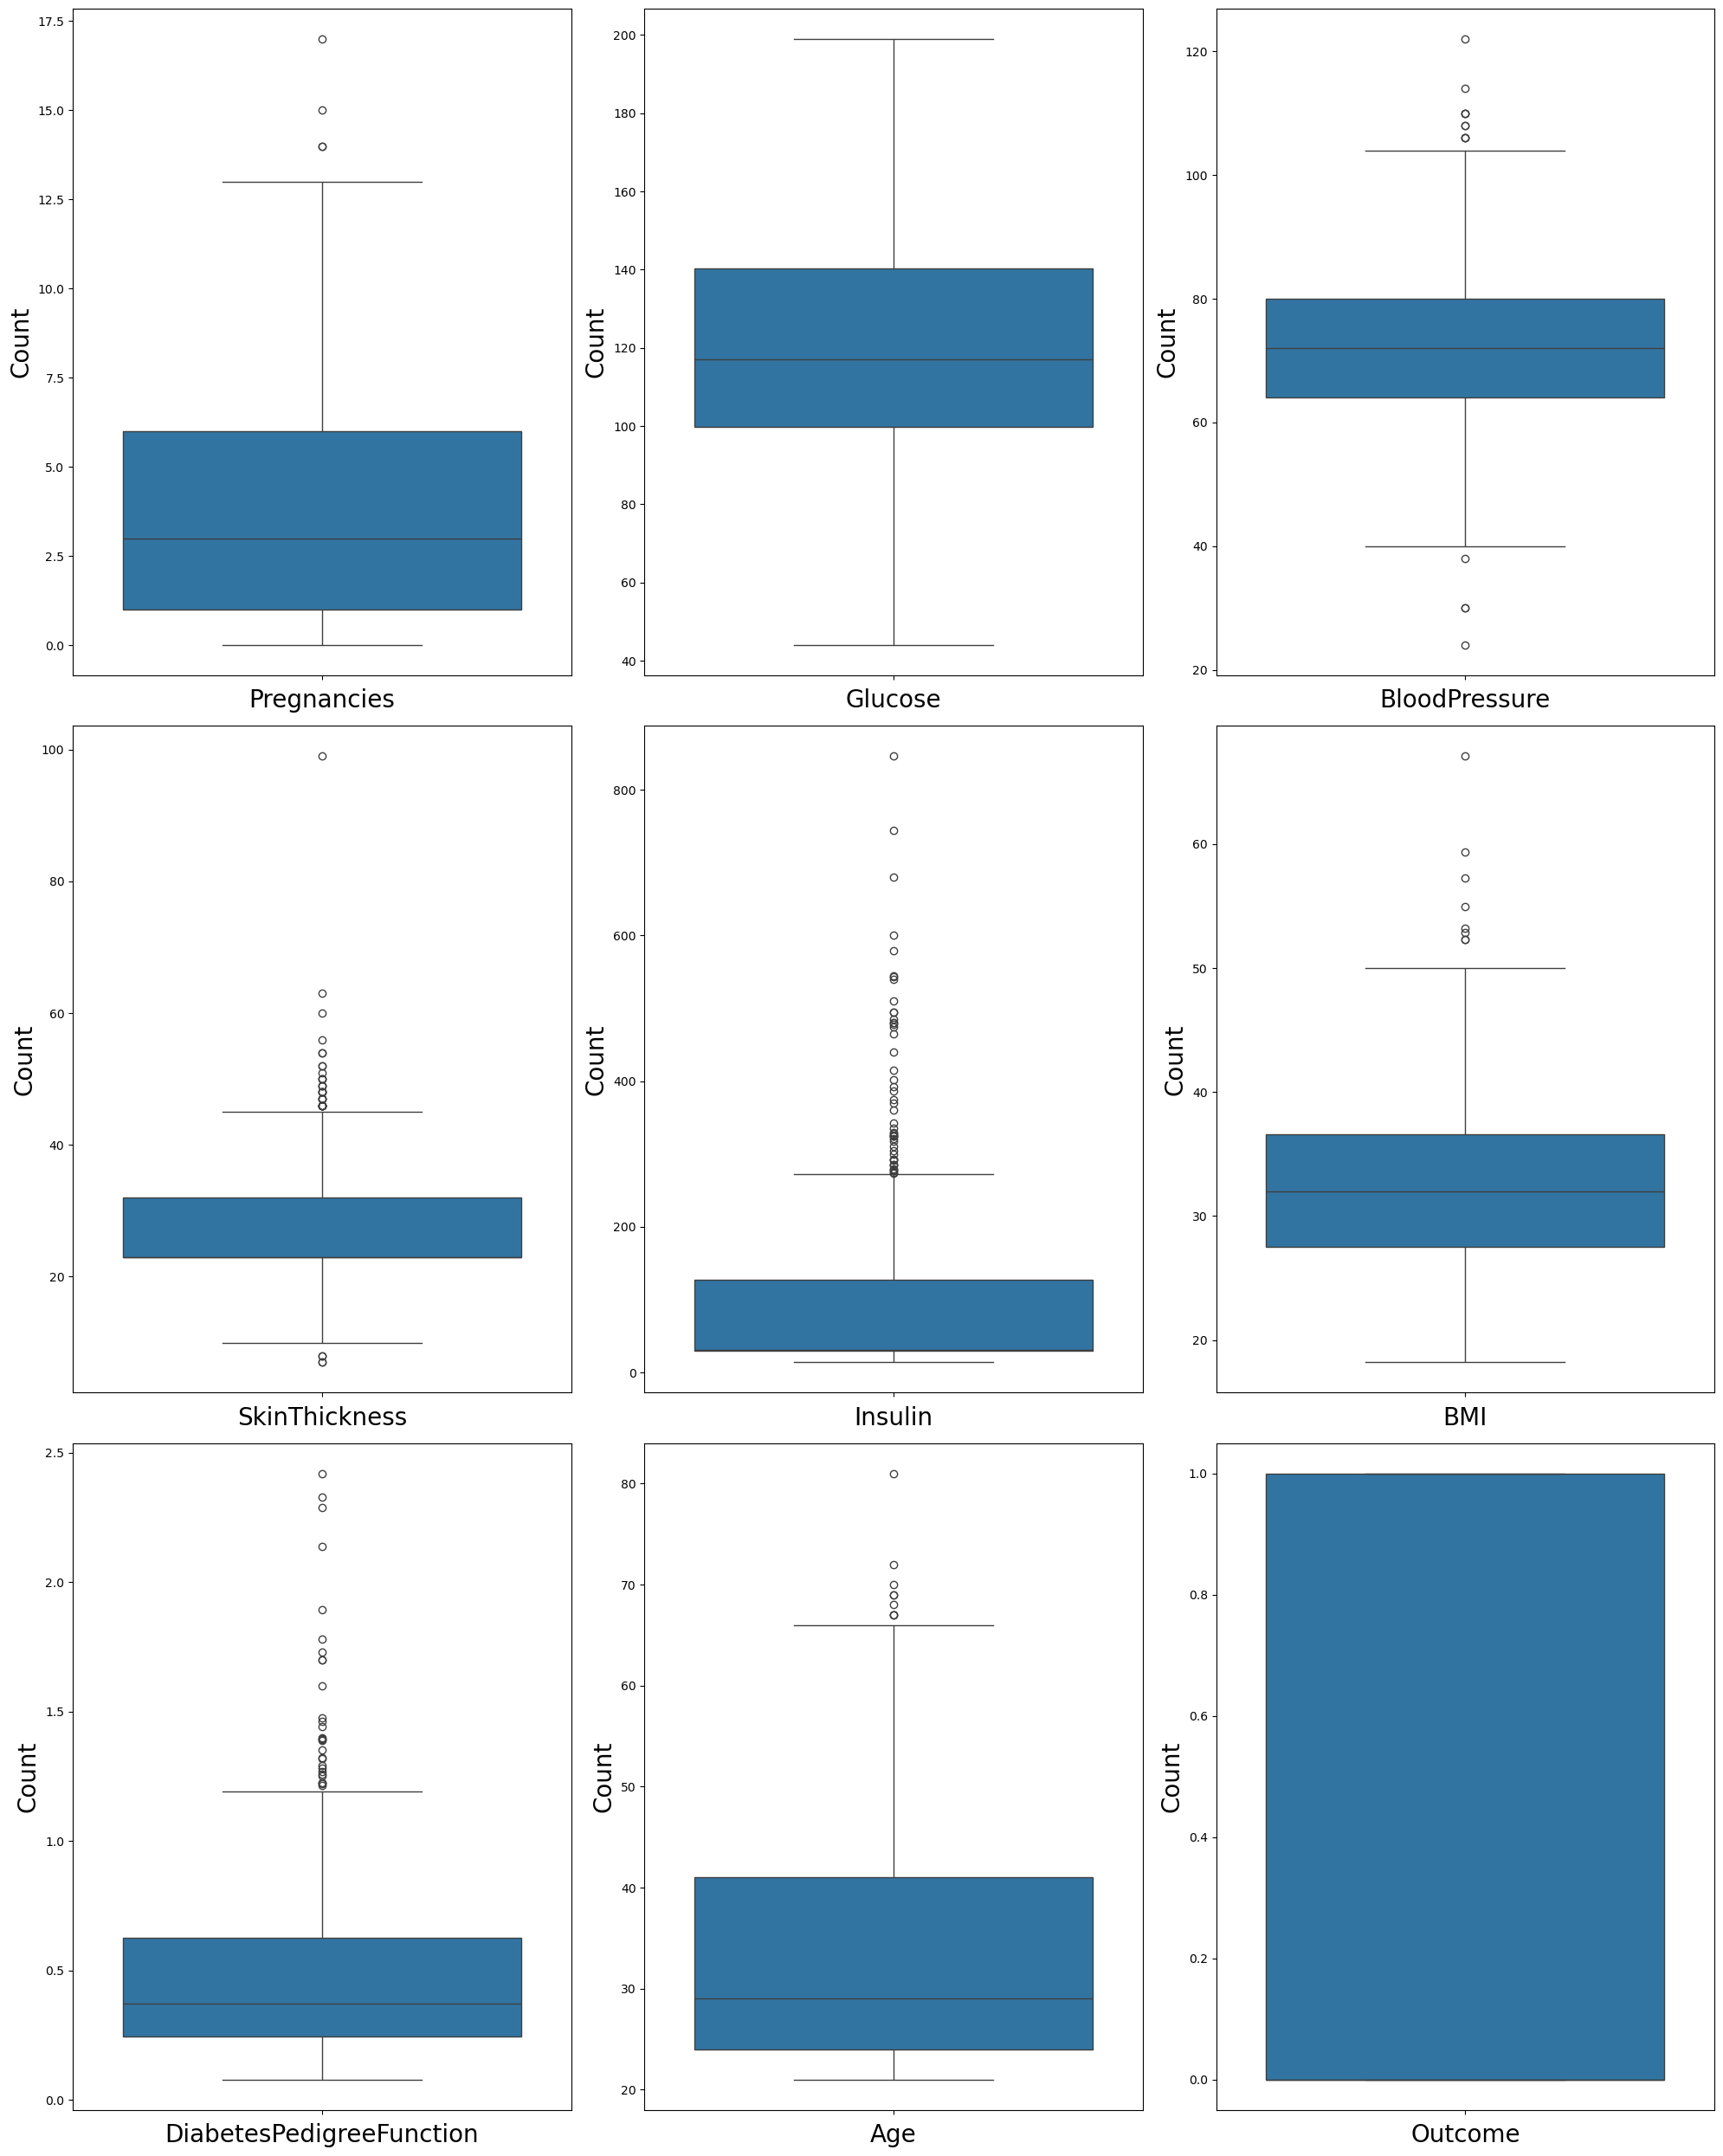

In [200]:
## Step 4:-Checking the outliers

plt.figure(figsize=(20,25),facecolor='White')

plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [201]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [202]:
# Step 5:-Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
d1=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(d1,axis=1))

In [203]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [204]:
con_data=data[['Pregnancies','Outcome']]

In [205]:
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [206]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [207]:
# type(data)

data2=pd.DataFrame(data,columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [208]:
data2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [209]:
type(data1)

numpy.ndarray

In [210]:
nD=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [211]:
nD

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [212]:
final_df=pd.concat([nD,con_data],axis=1)

In [213]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


In [214]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


<Axes: >

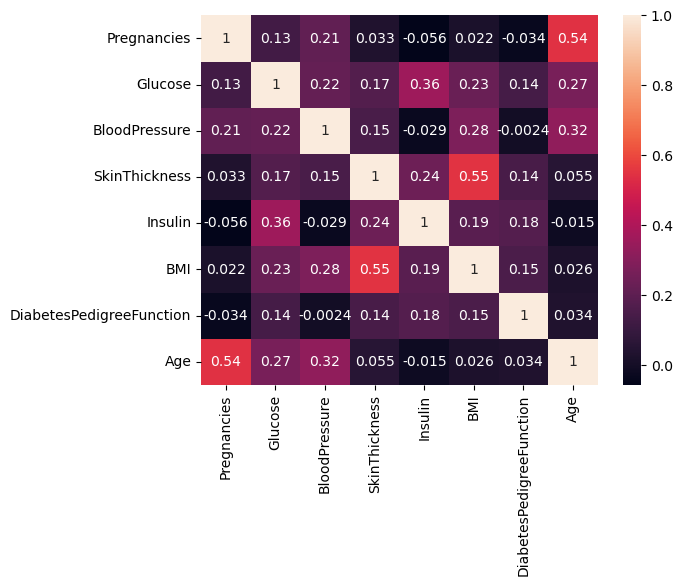

In [215]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

#### Model Creation

In [217]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [263]:
X=data.iloc[:,:-1]
X=X.iloc[:,1:]
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,30.5,33.6,0.627,50
1,85,66,29,30.5,26.6,0.351,31
2,183,64,23,30.5,23.3,0.672,32
3,89,66,23,94.0,28.1,0.167,21
4,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63
764,122,70,27,30.5,36.8,0.340,27
765,121,72,23,112.0,26.2,0.245,30
766,126,60,23,30.5,30.1,0.349,47


In [265]:
y=data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [267]:
## Step 1 Creating independent and dependent variable.

# X=final_df.iloc[:,:-1]
# y=final_df.Outcome

In [269]:
## Step 2 Creating training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.3)

In [273]:
X_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,158,84,41,210.0,39.4,0.395,29
51,101,50,15,36.0,24.2,0.526,26
66,109,88,30,30.5,32.5,0.855,38
437,147,75,23,30.5,29.9,0.434,28
665,112,80,45,132.0,34.8,0.217,24
...,...,...,...,...,...,...,...
38,90,68,42,30.5,38.2,0.503,27
354,90,78,23,30.5,42.7,0.559,21
18,103,30,38,83.0,43.3,0.183,33
229,117,80,31,53.0,45.2,0.089,24


In [275]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
38     1
354    0
18     0
229    0
540    1
Name: Outcome, Length: 231, dtype: int64

In [279]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [301]:
## Step 4 Prediction

y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [303]:
y_pred_prob=clf.predict_proba(X_test)

In [305]:
y_pred_prob

array([[0.33348524, 0.66651476],
       [0.9082105 , 0.0917895 ],
       [0.69229706, 0.30770294],
       [0.52069176, 0.47930824],
       [0.88392637, 0.11607363],
       [0.86568971, 0.13431029],
       [0.52236472, 0.47763528],
       [0.97108529, 0.02891471],
       [0.21795831, 0.78204169],
       [0.93411866, 0.06588134],
       [0.1045283 , 0.8954717 ],
       [0.47494024, 0.52505976],
       [0.94898161, 0.05101839],
       [0.40145555, 0.59854445],
       [0.73913872, 0.26086128],
       [0.94237049, 0.05762951],
       [0.01258582, 0.98741418],
       [0.5092632 , 0.4907368 ],
       [0.21331033, 0.78668967],
       [0.9789488 , 0.0210512 ],
       [0.43857549, 0.56142451],
       [0.65435195, 0.34564805],
       [0.47652591, 0.52347409],
       [0.8299458 , 0.1700542 ],
       [0.81241218, 0.18758782],
       [0.2920366 , 0.7079634 ],
       [0.89645635, 0.10354365],
       [0.19623903, 0.80376097],
       [0.04669873, 0.95330127],
       [0.91293852, 0.08706148],
       [0.

In [289]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [ ]:
confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [307]:
print(confusion_matrix(y_test,y_pred))

[[130  24]
 [ 37  40]]


In [309]:
print(precision_score(y_test,y_pred))

0.625


In [311]:
print(recall_score(y_test,y_pred))

0.5194805194805194


In [313]:
print(f1_score(y_test,y_pred))

0.5673758865248227


In [315]:
print(accuracy_score(y_test,y_pred))

0.7359307359307359


In [325]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       154
           1       0.62      0.52      0.57        77

    accuracy                           0.74       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231

